In [45]:
import pandas as pd
import numpy as np
import nltk 
import os 
import re
import nltk.corpus
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [2]:
jo2024 = pd.read_csv('/Users/juliencarbonnell/Desktop/Democracy Studio/DS - Partners/IDHN lab/JO2024 tweets.csv')

In [23]:
jo2024.shape

(686, 6)

In [5]:
olympics2024 = pd.read_csv('/Users/juliencarbonnell/Desktop/Democracy Studio/DS - Partners/IDHN lab/Olympics2024 tweets.csv')

In [24]:
olympics2024.shape

(274, 6)

In [6]:
paris2024 = pd.read_csv('/Users/juliencarbonnell/Desktop/Democracy Studio/DS - Partners/IDHN lab/Paris2024 tweets.csv')

In [25]:
paris2024.shape

(248, 6)

#### jo2024 is the most used hashtag so far, olympics2024 and paris2024 are equally used

In [11]:
jo2024.head()

,tweetDate,content,twitterProfile,tweetUrl,timestamp,query
0,Fri Jan 15 08:39:47 +0000 2021,Les jardiniers d'#Aubervilliers se rebiffent c...,https://twitter.com/deweyattitude,https://twitter.com/deweyattitude/status/13499...,2021-01-18T10:09:30.070Z,#JO2024
1,Tue Jan 12 09:38:45 +0000 2021,Pourtant des alternatives existent : en regard...,https://twitter.com/ColJardinsAuber,https://twitter.com/ColJardinsAuber/status/134...,2021-01-18T10:09:30.070Z,#JO2024
2,Tue Jan 12 11:14:02 +0000 2021,🇫🇷 FLASH - Voilà à quoi devraient ressembler l...,https://twitter.com/Mediavenir,https://twitter.com/Mediavenir/status/13489513...,2021-01-18T10:09:30.070Z,#JO2024
3,Wed Jan 13 19:02:58 +0000 2021,"Rencontre très constructive avec l'INPP, l'Ins...",https://twitter.com/Menchon_Herve,https://twitter.com/Menchon_Herve/status/13494...,2021-01-18T10:09:30.070Z,#JO2024
4,Mon Jan 11 08:37:02 +0000 2021,.@Anne_Hidalgo réaffirme sa volonté « de refai...,https://twitter.com/immoweek,https://twitter.com/immoweek/status/1348549466...,2021-01-18T10:09:30.070Z,#JO2024


In [14]:
olympics2024.head()

,tweetDate,content,twitterProfile,tweetUrl,timestamp,query
0,Mon Dec 07 20:02:28 +0000 2020,Breakdancing approved for 2024 Olympics along ...,https://twitter.com/LVTailgater,https://twitter.com/LVTailgater/status/1336038...,2021-01-18T10:27:41.674Z,#Olympics2024
1,Wed Jan 13 23:07:48 +0000 2021,Huge congratulations to our athlete TJ Hart fo...,https://twitter.com/BendStrength,https://twitter.com/BendStrength/status/134949...,2021-01-18T10:27:41.674Z,#Olympics2024
2,Wed Dec 09 00:32:02 +0000 2020,@united4_r Let me in. You won’t regret it.,https://twitter.com/CaptainHound1,https://twitter.com/CaptainHound1/status/13364...,2021-01-18T10:27:41.674Z,#Olympics2024
3,Thu Dec 10 13:21:25 +0000 2020,Can someone explain to me why Break Dancing wi...,https://twitter.com/seaskymountains,https://twitter.com/seaskymountains/status/133...,2021-01-18T10:27:41.674Z,#Olympics2024
4,Mon Dec 07 17:27:12 +0000 2020,#Breaking: Breakdancing to become an Olympic s...,https://twitter.com/LaunchpadSports,https://twitter.com/LaunchpadSports/status/133...,2021-01-18T10:27:41.674Z,#Olympics2024


In [15]:
paris2024.head()

,tweetDate,content,twitterProfile,tweetUrl,timestamp,query
0,Thu Jan 14 14:16:33 +0000 2021,#CAS saying #WADA wanted the sanctions on #Rus...,https://twitter.com/LMorgan21,https://twitter.com/LMorgan21/status/134972207...,2021-01-18T10:30:58.522Z,#Paris2024
1,Wed Jan 13 20:47:30 +0000 2021,Our Fearless #MarathonSailing team members Jes...,https://twitter.com/nchakar,https://twitter.com/nchakar/status/13494580718...,2021-01-18T10:30:58.522Z,#Paris2024
2,Tue Jan 12 15:47:12 +0000 2021,"Audrey Pierron is ""proud to be a pioneer"" of g...",https://twitter.com/ibsagoalball,https://twitter.com/ibsagoalball/status/134902...,2021-01-18T10:30:58.522Z,#Paris2024
3,Fri Jan 15 06:15:19 +0000 2021,#Paris2024 \nStarting the year on a positive n...,https://twitter.com/OWaiganjo,https://twitter.com/OWaiganjo/status/134996335...,2021-01-18T10:30:58.522Z,#Paris2024
4,Thu Jan 14 13:48:29 +0000 2021,.@wada_ama has claimed the CAS has failed to f...,https://twitter.com/insidethegames,https://twitter.com/insidethegames/status/1349...,2021-01-18T10:30:58.522Z,#Paris2024


#### It appears that most #jo2024 tweets are in French, while #olympics2024 and #paris2024 are in English. 

Let's check if its true on the whole content

In [18]:
# creating a text from the tweet content
jo2024_text = str(jo2024['content'].tolist()).strip('[]')
olympics2024_text = str(olympics2024['content'].tolist()).strip('[]')
paris2024_text = str(paris2024['content'].tolist()).strip('[]')

In [19]:
jo2024_text

'"Les jardiniers d\'#Aubervilliers se rebiffent contre le site d\'entrainement des #JO2024 et la gare du #GrandParis  https://t.co/ROJHJsj88u", "Pourtant des alternatives existent : en regardant les plans des piscines des JO de Barcelone et d\'Athènes, on voit qu\'elles pourraient parfaitement s\'inscrire sur l\'espace actuel SANS bétonner les Jardins Ouvriers des Vertus d\'Aubervilliers. \\nAlors, on revoit la copie pour 2024 ? https://t.co/wF9iKDrZN1", \'🇫🇷 FLASH - Voilà à quoi devraient ressembler les #ChampsElysees d’ici 2024. Des travaux vont être entrepris sur la Place de la #Concorde, puis sur la célèbre avenue avant les #JO2024. (Le Parisien) #Paris https://t.co/GXVaCL8RBj\', "Rencontre très constructive avec l\'INPP, l\'Institut National de #Plongée Professionnelle, où s\'installent deux belles associations afin de permettre la réalisation des travaux des #JO2024 sur la base nautique du Roucas à @marseille. https://t.co/ylr1eIiZ6I", \'.@Anne_Hidalgo réaffirme sa volonté « de r

In [20]:
olympics2024_text

'\'Breakdancing approved for 2024 Olympics along w skateboarding, sport climbing, surfing. Gonna be great seeing peeps compete for all the glory in these categories! #Olympics2024\', \'Huge congratulations to our athlete TJ Hart for being selected to compete for Team @USWeightlifting at the @iwfnet Junior World Championships! #weightlifting #tallahassee #olympics2024 #teamusa https://t.co/DzhzjPHK7O\', \'@united4_r Let me in. You won’t regret it.\', \'Can someone explain to me why Break Dancing will be at the #Olympics2024 and Ultimate Frisbee won’t? Asking for several hundred friends.\', \'#Breaking: Breakdancing to become an Olympic sport. Will be included in the 2024 (Paris) edition of the event.\\n\\n@Olympics #Olympics2024 https://t.co/USZHMMld6u\', "Here\'s something I never thought I would see...#Breakdancing at #Olympics2024. This is huge for the culture. https://t.co/cszyB0mFai", \'Breakdancing to Make Its Olympic debut at Paris 2024..\\n\\n#nextnews #youth #sport #Olympics202

In [21]:
paris2024_text

'\'#CAS saying #WADA wanted the sanctions on #Russia to apply for two #Olympics - one summer and one winter - is a moot point, IMO. #Paris2024 only came into the equation because of the appeal + the time it took for the case to be heard\', \'Our Fearless #MarathonSailing team members Jesse Fielding and Francesca Clapcich compete to qualify for the #Paris2024 #Olympics. Follow their latest developments on our Marathon Sailing newsroom. https://t.co/Gn3E8ZOg83\', \'Audrey Pierron is "proud to be a pioneer" of goalball in France ahead of @Paris2024 \\n\\nNext stop 👉 Lahti, Finland, for the Euros B!\\n\\nRead more ▶️ https://t.co/Xebn89XAdU\\n\\n@FRAparalympique @FFHandisport @Paralympics https://t.co/8fK9NfZkRs\', \'#Paris2024 \\nStarting the year on a positive note. We will work, train, strategise, listen and learn for one of us to make it to the Kenya team,olympic medal and eventually turn pro. All the help we can get is humbly accepted. https://t.co/Z2fc1ppcko\', \'.@wada_ama has claim

#### finally #olympics2024 and #paris2024 are multi-languages while #jo2024 is french exclusive

For now, will need to decide which unique language analysis to process on each dataset. 
- jo2024 : French treatment
- olympics2024 + paris2024 merged : English treatment

In [27]:
en_merged = pd.concat([olympics2024, paris2024], axis =0)

In [28]:
en_merged_text = str(en_merged['content'].tolist()).strip('[]')

# 1. Data Cleaning

In [29]:
#normalise texts in low characters
jo2024_text = jo2024_text.lower()
en_merged_text = en_merged_text.lower()

In [37]:
# removing @mention
jo2024_text = re.sub(r'@[A-Za-z0-9]+','', jo2024_text)
en_merged_text = re.sub(r'@[A-Za-z0-9]+','', en_merged_text)

In [38]:
# removing url links
jo2024_text = re.sub('https?://[A-Za-z0-9./]+','', jo2024_text)
en_merged_text = re.sub('https?://[A-Za-z0-9./]+','', en_merged_text)

In [40]:
#remove digits
jo2024_text = ''.join([i for i in jo2024_text if not i.isdigit()])
en_merged_text = ''.join([i for i in en_merged_text if not i.isdigit()])

In [41]:
#tokenise the texts
jo2024_token = word_tokenize(jo2024_text)
en_merged_token = word_tokenize(en_merged_text)

In [42]:
# remove stopwords in both languages
fr_to_remove = set(stopwords.words('french'))
en_to_remove = set(stopwords.words('english'))

jo2024_clean = [x for x in jo2024_token if x not in fr_to_remove]
en_merged_clean = [x for x in en_merged_token if x not in en_to_remove]

In [43]:
# remove ponctuation and symbols
b = [",", ".", ";", " ", ":", "'", "als", "&", "etc", "(", ")", "/", "[1-9]", "_", "-", "’", "--", "``", "'s", ""]

jo2024_clean = [x for x in jo2024_clean if x not in b]
en_merged_clean = [x for x in en_merged_clean if x not in b]

In [46]:
# check the frequency of top 100 words
jo2024_100 = FreqDist(jo2024_clean).most_common(100)
en_merged_100 = FreqDist(en_merged_clean).most_common(100)

In [47]:
print('JO2024 100 most frequent words are', jo2024_100)
print('Olympics2024 + Paris2024 merged 100 most frequent words are', en_merged_100)

JO2024 100 most frequent words are [('#', 1800), ('jo', 596), ('!', 217), ('paris', 205), ('\\n', 120), ('jeux', 109), ("''", 107), ('?', 91), ('olympiques', 91), ('a', 88), ('préparation', 81), ('sport', 61), ('...', 60), ('accueillir', 59), ('sites', 52), ('\\n\\n', 50), ('jardins', 43), ('être', 43), ('centre', 43), ('comme', 43), ('ville', 41), ('paralympiques', 40), ('olympique', 40), ('»', 39), ('via', 39), ('«', 38), ('délégations', 38), ('plus', 36), ('terredejeux', 34), ('[', 32), (']', 32), ('sports', 32), ('centres', 31), ('sportifs', 31), ("c'est", 29), ('projet', 29), ('athlètes', 28), ('retenus', 28), ('stade', 26), ('place', 25), ('avant', 25), ('france', 25), ("d'aubervilliers", 24), ('ici', 24), ('_hidalgo', 24), ('mairie', 24), ('vertus', 23), ('h', 23), ('cette', 23), ('football', 22), ('monde', 22), ('quoi', 21), ('vont', 21), ('aubervilliers', 20), ('concorde', 20), ('terre', 20), ('|', 20), ('cadre', 19), ('va', 19), ('sauvons', 19), ('retenue', 19), ('champselyse

# 2. Data Visualisation

In [48]:
#create a wordcloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

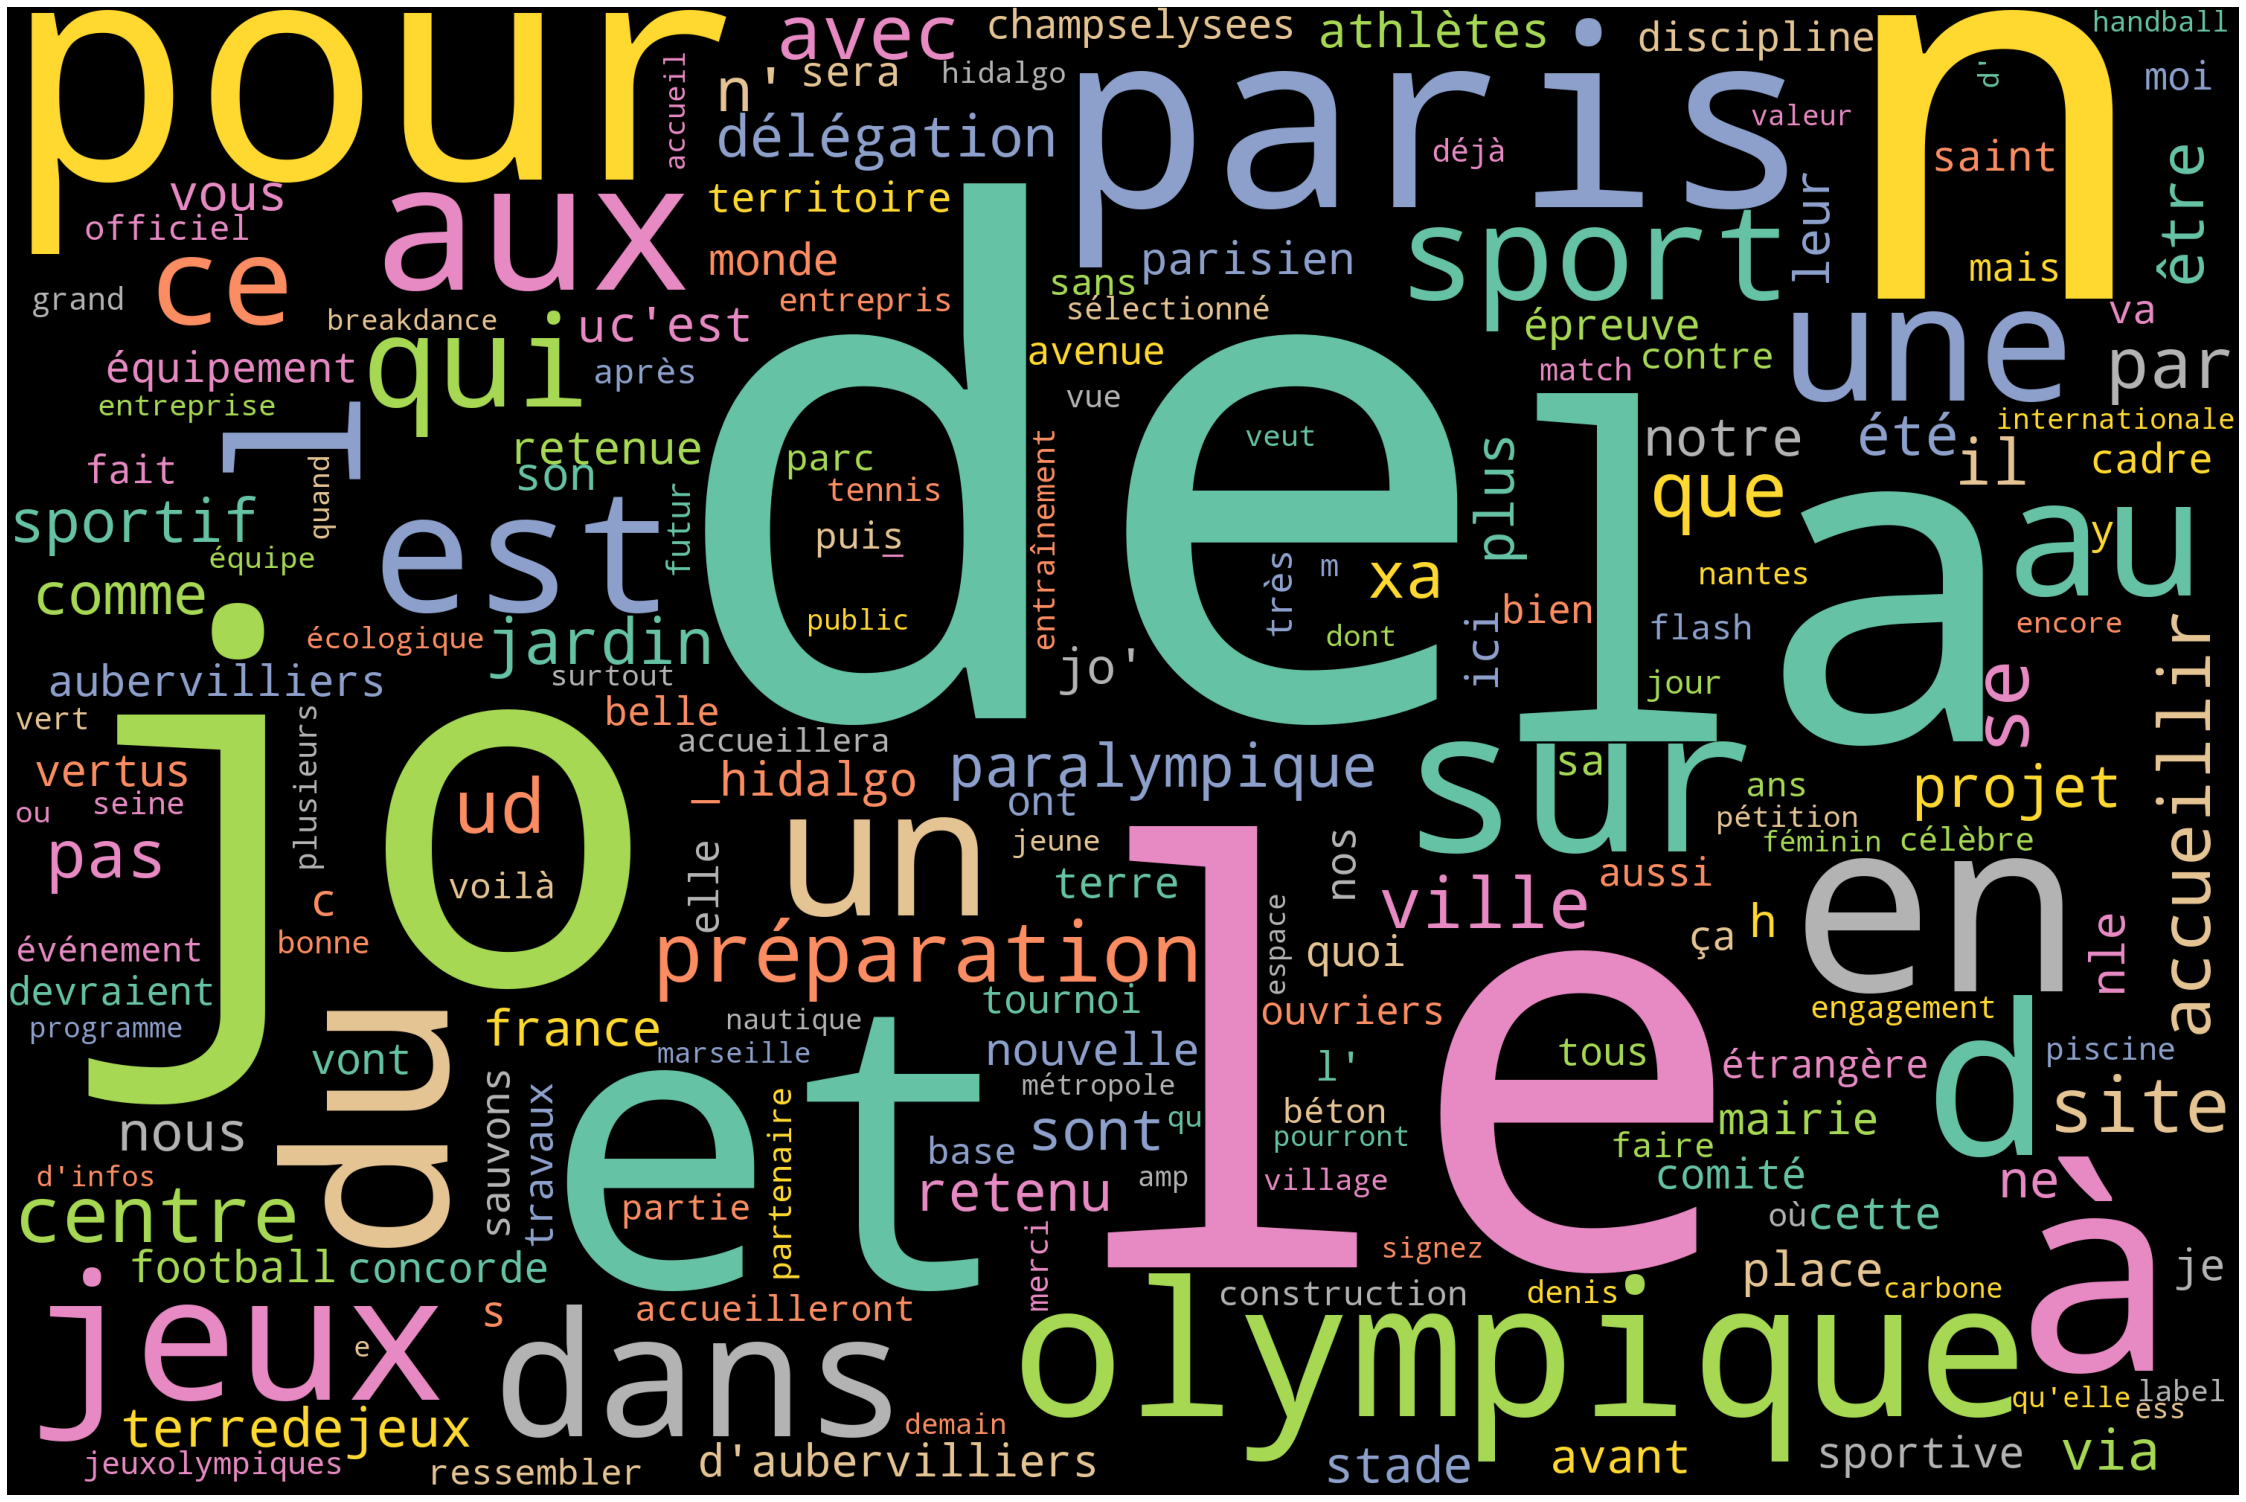

In [50]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(jo2024_text)
# Plot
plot_cloud(wordcloud)

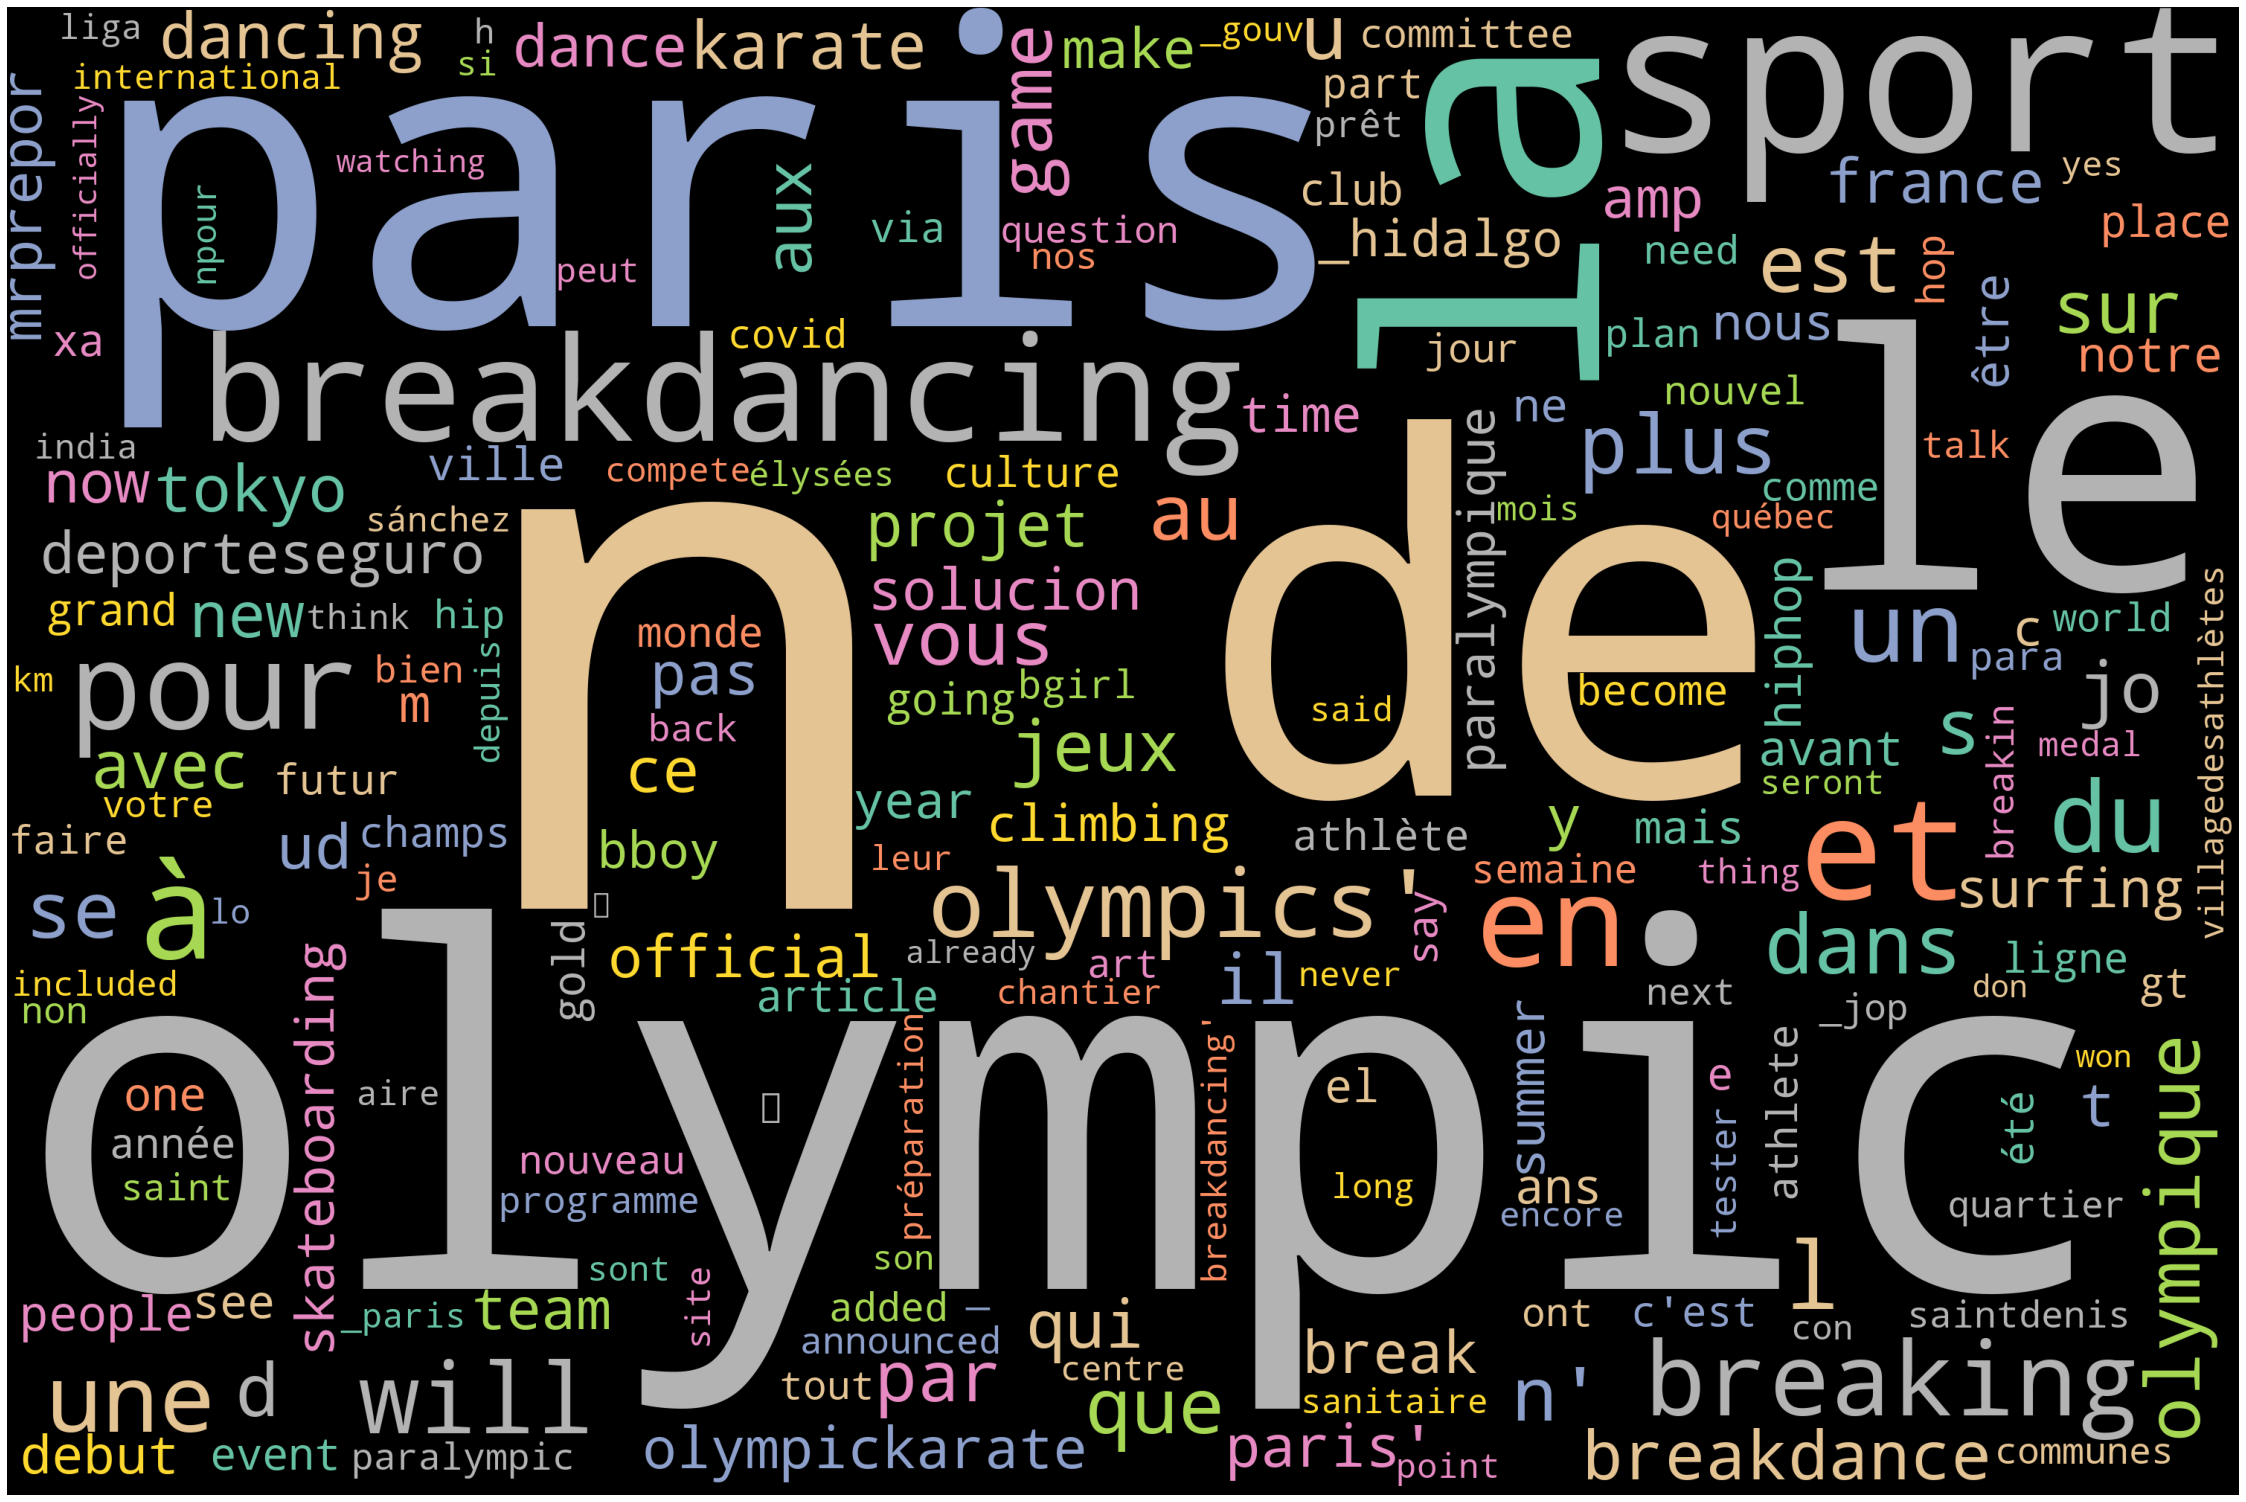

In [51]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(en_merged_text)
# Plot
plot_cloud(wordcloud)